In [6]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import pandas as pd
from keras.models import Model
from sklearn.model_selection import KFold
from keras import regularizers
import keras
import os
import tensorflow as tf
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Activation,Flatten,MaxPool2D,Conv2D,Dropout
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import itertools
num_folds = 10
%matplotlib inline


In [7]:
from keras.datasets import cifar10
(X_train,y_train),(X_test, y_test) = cifar10.load_data()


In [8]:
datagen = ImageDataGenerator(rotation_range=90,
                           shear_range = 0.2,
                           zoom_range=0.2,
                          horizontal_flip=True)
datagen.fit(X_train)

In [9]:
y_train_one_hot = to_categorical(y_train,10)
y_test_one_hot = to_categorical(y_test,10)

In [10]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [13]:
acc_per_fold = []
loss_per_fold = []

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train_one_hot, y_test_one_hot), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

In [15]:

fold_no =1


for train,test in kfold.split(inputs,targets):   
    
    mobile = keras.applications.mobilenet.MobileNet(include_top=False,input_shape=(32,32,3))
    #mobile.summary()

    for layer in mobile.layers:
         layer.trainable = False 
            
    x = mobile.output
    x = Flatten()(x)
    prediction_layer = Dense(10, activation='softmax')(x) 
    model = Model(inputs=mobile.input, outputs=prediction_layer)    
    
    model.compile(Adam(lr=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print('-----')
    print(f'Training for fold {fold_no} ...')
    epochs=5
    his = model.fit(inputs[train],
                targets[train],
                validation_split = 0.3,
                batch_size=32,
                epochs = epochs)  
    
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    fold_no = fold_no + 1

C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


-----
Training for fold 1 ...
Train on 37800 samples, validate on 16200 samples
Epoch 1/5
37800/37800 [==============================] - 161s 4ms/step - loss: 2.1072 - accuracy: 0.3582 - val_loss: 2.3108 - val_accuracy: 0.0978
Epoch 2/5
37800/37800 [==============================] - 156s 4ms/step - loss: 1.7166 - accuracy: 0.4271 - val_loss: 2.3132 - val_accuracy: 0.0981
Epoch 3/5
37800/37800 [==============================] - 158s 4ms/step - loss: 1.6933 - accuracy: 0.4288 - val_loss: 2.3098 - val_accuracy: 0.0973
Epoch 4/5
37800/37800 [==============================] - 157s 4ms/step - loss: 1.7038 - accuracy: 0.4277 - val_loss: 2.3079 - val_accuracy: 0.0980
Epoch 5/5
37800/37800 [==============================] - 158s 4ms/step - loss: 1.7035 - accuracy: 0.4245 - val_loss: 2.3098 - val_accuracy: 0.1026
Score for fold 1: loss of 2.3108005599975585; accuracy of 10.249999910593033%


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


-----
Training for fold 2 ...
Train on 37800 samples, validate on 16200 samples
Epoch 1/5
37800/37800 [==============================] - 162s 4ms/step - loss: 2.0902 - accuracy: 0.3588 - val_loss: 2.3079 - val_accuracy: 0.0967
Epoch 2/5
37800/37800 [==============================] - 157s 4ms/step - loss: 1.7094 - accuracy: 0.4221 - val_loss: 2.3082 - val_accuracy: 0.0982
Epoch 3/5
37800/37800 [==============================] - 157s 4ms/step - loss: 1.7016 - accuracy: 0.4277 - val_loss: 2.3052 - val_accuracy: 0.0973
Epoch 4/5
37800/37800 [==============================] - 155s 4ms/step - loss: 1.6998 - accuracy: 0.4324 - val_loss: 2.3066 - val_accuracy: 0.1008
Epoch 5/5
37800/37800 [==============================] - 157s 4ms/step - loss: 1.6967 - accuracy: 0.4290 - val_loss: 2.3083 - val_accuracy: 0.0978
Score for fold 2: loss of 2.307032212575277; accuracy of 10.01666635274887%


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


-----
Training for fold 3 ...
Train on 37800 samples, validate on 16200 samples
Epoch 1/5
37800/37800 [==============================] - 161s 4ms/step - loss: 2.0967 - accuracy: 0.3567 - val_loss: 2.3055 - val_accuracy: 0.0970
Epoch 2/5
37800/37800 [==============================] - 156s 4ms/step - loss: 1.7167 - accuracy: 0.4249 - val_loss: 2.3059 - val_accuracy: 0.0973
Epoch 3/5
37800/37800 [==============================] - 154s 4ms/step - loss: 1.7083 - accuracy: 0.4252 - val_loss: 2.3070 - val_accuracy: 0.0967
Epoch 4/5
37800/37800 [==============================] - 151s 4ms/step - loss: 1.7028 - accuracy: 0.4263 - val_loss: 2.3118 - val_accuracy: 0.0984
Epoch 5/5
37800/37800 [==============================] - 156s 4ms/step - loss: 1.6963 - accuracy: 0.4309 - val_loss: 2.3121 - val_accuracy: 0.0978
Score for fold 3: loss of 2.310367744445801; accuracy of 10.28333306312561%


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


-----
Training for fold 4 ...
Train on 37800 samples, validate on 16200 samples
Epoch 1/5
37800/37800 [==============================] - 157s 4ms/step - loss: 2.0835 - accuracy: 0.3620 - val_loss: 2.3068 - val_accuracy: 0.0993
Epoch 2/5
37800/37800 [==============================] - 157s 4ms/step - loss: 1.7225 - accuracy: 0.4231 - val_loss: 2.3060 - val_accuracy: 0.0964
Epoch 3/5
37800/37800 [==============================] - 161s 4ms/step - loss: 1.6999 - accuracy: 0.4316 - val_loss: 2.3078 - val_accuracy: 0.0962
Epoch 4/5
37800/37800 [==============================] - 162s 4ms/step - loss: 1.6953 - accuracy: 0.4282 - val_loss: 2.3111 - val_accuracy: 0.0959
Epoch 5/5
37800/37800 [==============================] - 161s 4ms/step - loss: 1.7032 - accuracy: 0.4283 - val_loss: 2.3064 - val_accuracy: 0.0972
Score for fold 4: loss of 2.3057260144551597; accuracy of 9.816666692495346%


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


-----
Training for fold 5 ...
Train on 37800 samples, validate on 16200 samples
Epoch 1/5
37800/37800 [==============================] - 169s 4ms/step - loss: 2.1016 - accuracy: 0.3567 - val_loss: 2.3090 - val_accuracy: 0.1071
Epoch 2/5
37800/37800 [==============================] - 162s 4ms/step - loss: 1.7316 - accuracy: 0.4203 - val_loss: 2.3081 - val_accuracy: 0.0973
Epoch 3/5
37800/37800 [==============================] - 164s 4ms/step - loss: 1.7083 - accuracy: 0.4275 - val_loss: 2.3062 - val_accuracy: 0.0936
Epoch 4/5
37800/37800 [==============================] - 176s 5ms/step - loss: 1.6984 - accuracy: 0.4318 - val_loss: 2.3058 - val_accuracy: 0.0985
Epoch 5/5
37800/37800 [==============================] - 175s 5ms/step - loss: 1.7011 - accuracy: 0.4273 - val_loss: 2.3053 - val_accuracy: 0.0968
Score for fold 5: loss of 2.301616458892822; accuracy of 10.68333312869072%


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


-----
Training for fold 6 ...
Train on 37800 samples, validate on 16200 samples
Epoch 1/5
37800/37800 [==============================] - 185s 5ms/step - loss: 2.0907 - accuracy: 0.3596 - val_loss: 2.3043 - val_accuracy: 0.0925
Epoch 2/5
37800/37800 [==============================] - 179s 5ms/step - loss: 1.7227 - accuracy: 0.4210 - val_loss: 2.3060 - val_accuracy: 0.1008
Epoch 3/5
37800/37800 [==============================] - 178s 5ms/step - loss: 1.7032 - accuracy: 0.4274 - val_loss: 2.3067 - val_accuracy: 0.0999
Epoch 4/5
37800/37800 [==============================] - 178s 5ms/step - loss: 1.6976 - accuracy: 0.4315 - val_loss: 2.3082 - val_accuracy: 0.0992
Epoch 5/5
37800/37800 [==============================] - 177s 5ms/step - loss: 1.6997 - accuracy: 0.4312 - val_loss: 2.3088 - val_accuracy: 0.0936
Score for fold 6: loss of 2.3101393960316976; accuracy of 8.85000005364418%


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


-----
Training for fold 7 ...
Train on 37800 samples, validate on 16200 samples
Epoch 1/5
37800/37800 [==============================] - 186s 5ms/step - loss: 2.0918 - accuracy: 0.3569 - val_loss: 2.3090 - val_accuracy: 0.0989
Epoch 2/5
37800/37800 [==============================] - 179s 5ms/step - loss: 1.7222 - accuracy: 0.4248 - val_loss: 2.3067 - val_accuracy: 0.1080
Epoch 3/5
37800/37800 [==============================] - 179s 5ms/step - loss: 1.6949 - accuracy: 0.4286 - val_loss: 2.3027 - val_accuracy: 0.1267
Epoch 4/5
37800/37800 [==============================] - 180s 5ms/step - loss: 1.6909 - accuracy: 0.4307 - val_loss: 2.3076 - val_accuracy: 0.0973
Epoch 5/5
37800/37800 [==============================] - 179s 5ms/step - loss: 1.7018 - accuracy: 0.4254 - val_loss: 2.3108 - val_accuracy: 0.0985
Score for fold 7: loss of 2.3100360056559244; accuracy of 9.716666489839554%


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


-----
Training for fold 8 ...
Train on 37800 samples, validate on 16200 samples
Epoch 1/5
37800/37800 [==============================] - 189s 5ms/step - loss: 2.0844 - accuracy: 0.3613 - val_loss: 2.3028 - val_accuracy: 0.1055
Epoch 2/5
37800/37800 [==============================] - 181s 5ms/step - loss: 1.7282 - accuracy: 0.4227 - val_loss: 2.3071 - val_accuracy: 0.0983
Epoch 3/5
37800/37800 [==============================] - 181s 5ms/step - loss: 1.6970 - accuracy: 0.4291 - val_loss: 2.3074 - val_accuracy: 0.0990
Epoch 4/5
37800/37800 [==============================] - 180s 5ms/step - loss: 1.6901 - accuracy: 0.4334 - val_loss: 2.3055 - val_accuracy: 0.0977
Epoch 5/5
37800/37800 [==============================] - 179s 5ms/step - loss: 1.6942 - accuracy: 0.4309 - val_loss: 2.3107 - val_accuracy: 0.0998
Score for fold 8: loss of 2.3121086025238036; accuracy of 9.866666793823242%


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


-----
Training for fold 9 ...
Train on 37800 samples, validate on 16200 samples
Epoch 1/5
37800/37800 [==============================] - 164s 4ms/step - loss: 2.0823 - accuracy: 0.3592 - val_loss: 2.3092 - val_accuracy: 0.1002
Epoch 2/5
37800/37800 [==============================] - 159s 4ms/step - loss: 1.7381 - accuracy: 0.4173 - val_loss: 2.3042 - val_accuracy: 0.0993
Epoch 3/5
37800/37800 [==============================] - 175s 5ms/step - loss: 1.7137 - accuracy: 0.4258 - val_loss: 2.3047 - val_accuracy: 0.1003
Epoch 4/5
37800/37800 [==============================] - 173s 5ms/step - loss: 1.6929 - accuracy: 0.4324 - val_loss: 2.3061 - val_accuracy: 0.1021
Epoch 5/5
37800/37800 [==============================] - 173s 5ms/step - loss: 1.7017 - accuracy: 0.4298 - val_loss: 2.3064 - val_accuracy: 0.1173
Score for fold 9: loss of 2.3024103317260742; accuracy of 12.283333390951157%


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


-----
Training for fold 10 ...
Train on 37800 samples, validate on 16200 samples
Epoch 1/5
37800/37800 [==============================] - 181s 5ms/step - loss: 2.1024 - accuracy: 0.3568 - val_loss: 2.3105 - val_accuracy: 0.0991
Epoch 2/5
37800/37800 [==============================] - 175s 5ms/step - loss: 1.7213 - accuracy: 0.4239 - val_loss: 2.3090 - val_accuracy: 0.0969
Epoch 3/5
37800/37800 [==============================] - 174s 5ms/step - loss: 1.6987 - accuracy: 0.4306 - val_loss: 2.3068 - val_accuracy: 0.0960
Epoch 4/5
37800/37800 [==============================] - 174s 5ms/step - loss: 1.6972 - accuracy: 0.4325 - val_loss: 2.3080 - val_accuracy: 0.0973
Epoch 5/5
37800/37800 [==============================] - 176s 5ms/step - loss: 1.6926 - accuracy: 0.4301 - val_loss: 2.3078 - val_accuracy: 0.0950
Score for fold 10: loss of 2.3089031416575114; accuracy of 9.300000220537186%


In [16]:
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('---')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')

print('Average scores for all folds:')
print(f'Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'Loss: {np.mean(loss_per_fold)}')
print('DONE!')

Score per fold
---
> Fold 1 - Loss: 2.3108005599975585 - Accuracy: 10.249999910593033%
---
> Fold 2 - Loss: 2.307032212575277 - Accuracy: 10.01666635274887%
---
> Fold 3 - Loss: 2.310367744445801 - Accuracy: 10.28333306312561%
---
> Fold 4 - Loss: 2.3057260144551597 - Accuracy: 9.816666692495346%
---
> Fold 5 - Loss: 2.301616458892822 - Accuracy: 10.68333312869072%
---
> Fold 6 - Loss: 2.3101393960316976 - Accuracy: 8.85000005364418%
---
> Fold 7 - Loss: 2.3100360056559244 - Accuracy: 9.716666489839554%
---
> Fold 8 - Loss: 2.3121086025238036 - Accuracy: 9.866666793823242%
---
> Fold 9 - Loss: 2.3024103317260742 - Accuracy: 12.283333390951157%
---
> Fold 10 - Loss: 2.3089031416575114 - Accuracy: 9.300000220537186%
Average scores for all folds:
Accuracy: 10.10666660964489 (+- 0.8748713917767688)
Loss: 2.3079140467961627
DONE!


In [17]:

model.save_weights('mn2.hdf5')

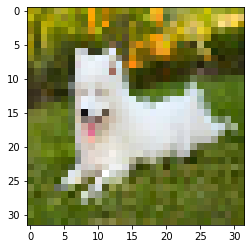

In [35]:
img_pred = image.load_img('dog2.jpg', target_size=(32,32,3))
plt.imshow(img_pred)
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

In [36]:
#Get the probabilities

probabilities = model.predict(img_pred)
probabilities

array([[0.09627893, 0.08974995, 0.10187139, 0.09879209, 0.1201558 ,
        0.08747989, 0.12274177, 0.08559255, 0.09276883, 0.10456876]],
      dtype=float32)

In [34]:
class_name =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

index = np.argsort(probabilities[0,:])
print('Most likely class :', class_name[index[9]] , ', Probability : ', probabilities[0 , index[9]])
print('Most second  likely class :', class_name[index[8]] , ', Probability : ', probabilities[0 , index[8]])
print('Most third  likely class :', class_name[index[7]] , ', Probability : ', probabilities[0 , index[7]])




Most likely class : deer , Probability :  0.1322481
Most second  likely class : airplane , Probability :  0.12065996
Most third  likely class : frog , Probability :  0.11102357
